# Project 1 - Quality control for a clock manufacturing company [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

There is an imaginary clock manufacturing company that wants you to develop software to check the quality of its products. The clocks produced by this company have **two hands**:

- the small hand is **red** and indicates the **hour**,
- the long hand is **green** and indicates the minutes.

We refer to these as *the hour hand* and *the minute hand* respectively. These clocks do not have any other hands (although some other clocks have a third hand indicating the seconds).

It is very important for these hands to be properly aligned. For example, if the hour hand is pointing to the hour `3` (being horizontal and pointing toward right), the minute hand should be pointing toward the hour `12` (vertical and pointing upward). Another example is when the hour hand is pointing to the hour `1:30` (making a 45 degree angle from the vertical line), the minute hand should be pointing toward hour `6` (vertical and downward).

| Correct `1:30`, the hour hand is halfway between 1 and 2. | Incorrect `1.30`, the hour hand is too close to 1. |
|:--:|:--:|
| ![Correct 1.30](graphics/one_thirty_correct.png) | ![Incorrect 1.30](graphics/one_thirty_incorrect.png) |

Due to production imprecisions, this is not the case all the time. Your software package will **quantify the potential misalignments** and help the company to return the faulty clocks back to the production line for re-adjustment.

You will achieve this goal in several steps during this project. Most steps can be done independently. Therefore, if you are struggling with one part, you can move on to other tasks and gain the marks allocated to them.

For most tasks, under "✅ *Testing:*", you will be given instructions on how to check that your function works as it should, even if you haven't done the previous task.


---

## Task 1: Reading images into NumPy arrays [3 marks]

The company takes a picture of each clock, and saves it as a PNG image of 101x101 pixels. The folder `clock_images` contains the photos of all the clocks you need to control today.

In a PNG colour image, the colour of each pixel can be represented by 3 numbers between 0 and 1, indicating respectively the amount of **red**, the amount of **green**, and the amount of **blue** needed to make this colour. This is why we refer to colour images as **RGB** images.

- If all 3 values are 0, the pixel is black.
- If all 3 values are 1, the pixel is white.
- If all 3 values are the same, the pixel is grey. The smaller the values, the darker it is.
- Different amounts of red, green, and blue correspond to different colours.

For example, select a few colours [using this tool](https://doc.instantreality.org/tools/color_calculator/), and check the RGB values for that colour in the *RGB Normalized decimal* box. You should see that, for instance, to make yellow, we need a high value of red, a high value of green, and a low value of blue.

If you'd like more information, [this page](https://web.stanford.edu/class/cs101/image-1-introduction.html) presents a good summary about RGB images.

---

🚩 Study the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) for the functions `imread()` and `imshow()` from `matplotlib.pyplot`. Then, write code below to read the `clock_0` image from `batch_0` into a NumPy array, and display the image.

You will obtain a NumPy array with shape `(101, 101, 3)`, i.e. an array which is 3 layers deep. Each of these layers is a 101x101 array, where the elements represent the intensity of red, green, and blue respectively, for each pixel. For example, the element of this array with index `[40, 20, 2]` corresponds to the amount of blue in the pixel located in row 40, column 20.

Create a second figure, with 3 sets of axes, and use `imshow()` to display each layer separately on its own set of axes. Label your figures appropriately to clearly indicate what each image is showing.

*Note: you can use `ax.imshow()` to display an image on the axes `ax`, the same way we use `ax.plot()`.*

(101, 101, 3)
[[[0.94509804 0.94509804 0.94509804]
  [0.9647059  0.9647059  0.9647059 ]
  [0.94509804 0.94509804 0.94509804]
  ...
  [0.91764706 0.91764706 0.91764706]
  [0.9254902  0.9254902  0.9254902 ]
  [0.9019608  0.9019608  0.9019608 ]]

 [[0.8784314  0.8784314  0.8784314 ]
  [0.8901961  0.8901961  0.8901961 ]
  [0.89411765 0.89411765 0.89411765]
  ...
  [0.84705883 0.84705883 0.84705883]
  [0.96862745 0.96862745 0.96862745]
  [0.8862745  0.8862745  0.8862745 ]]

 [[0.9372549  0.9372549  0.9372549 ]
  [0.84313726 0.84313726 0.84313726]
  [0.8666667  0.8666667  0.8666667 ]
  ...
  [0.9019608  0.9019608  0.9019608 ]
  [0.8980392  0.8980392  0.8980392 ]
  [0.9529412  0.9529412  0.9529412 ]]

 ...

 [[0.8627451  0.8627451  0.8627451 ]
  [0.84705883 0.84705883 0.84705883]
  [0.9607843  0.9607843  0.9607843 ]
  ...
  [0.9098039  0.9098039  0.9098039 ]
  [0.9372549  0.9372549  0.9372549 ]
  [0.8980392  0.8980392  0.8980392 ]]

 [[0.8784314  0.8784314  0.8784314 ]
  [0.90588236 0.9058823

Text(0.5, 0.98, 'Display .png file in seperated layers')

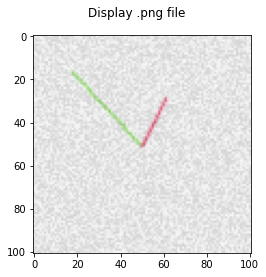

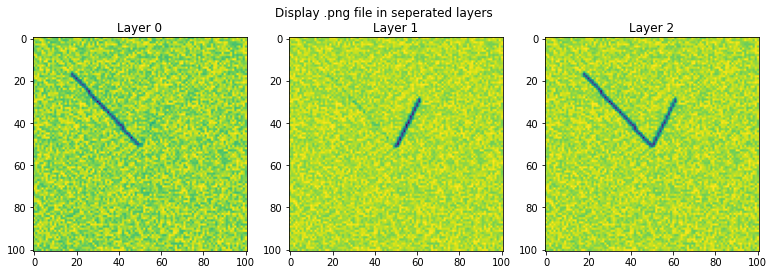

In [681]:
#import libraries with will be use in this project
import numpy as np
import matplotlib.pyplot as plt
import math

#read .png file then get the pixel array and show it as figure.
    # Lines : 10-14 : phyblas
    # URL: https://phyblas.hinaboshi.com/oshi02
    # Accessed on 1 Nov 2021.
read_clock = plt.imread('clock_images/batch_0/clock_1.png') #read png file
print(read_clock.shape) #print shape of pixel array
print(read_clock)       #print pixel array
plt.imshow(read_clock)  #show in picture
plt.suptitle('Display .png file')

#show seperated layers
#How to plot multi-graph in 1 figure.
    # Lines : 21-28 : matplotlib example
    # URL: https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py
    # Accessed on 1 Nov 2021.
fig2, axs = plt.subplots(1, 3, figsize=(13, 4))
axs[0].set_title('Layer 0')
axs[0].imshow(read_clock[0:101,0:101,0])
axs[1].set_title('Layer 1')
axs[1].imshow(read_clock[0:101,0:101,1])
axs[2].set_title('Layer 2')
axs[2].imshow(read_clock[0:101,0:101,2])
fig2.suptitle('Display .png file in seperated layers')


---
## Task 2: Clean up the images to extract data [6 marks]

Later in Task 3, we will use **linear regression** to find the exact position of both clock hands. To perform linear regression, we will need the **coordinates of the pixels** belonging to each hand; then, we will be able to fit a line through these pixels.

This task is concerned with extracting the correct pixel coordinates from the image.

---

🚩 Write a function `get_clock_hands(clock_RGB)`, which takes one input argument `clock_RGB`, a NumPy array of size 101x101x3 representing an RGB image of a clock, and returns 2 NumPy arrays with 2 columns each, such that:

- In the first array, each row corresponds to the `[row, column]` index of a pixel belonging to the **hour hand**.
- In the second array, each row corresponds to the `[row, column]` index of a pixel belonging the **minute hand**.

The goal is to obtain, for each hand, a collection of `[row, column]` coordinates which indicate where on the picture is the clock hand. You will need to figure out a way to decide whether a given pixel belongs to the hour hand, the minute hand, or neither.


---

***Important note:*** the pictures all contain some amount of noise and blur. Depending on how you decide to count a certain pixel or not as part of a clock hand, your function will pick up different pixels. There isn't just one possible set of pixel coordinates to pick up for a given image -- the most important thing is that the pixels you extract **only** belong to one of the two hands, and not to the background for example. This will ensure that you can use linear regression efficiently.

---

✅ *Testing:* For example, for the tiny 7x7 clock below (a 7x7 pixel image is available in the `testing` folder for you to try your function):

| Clock | Hour hand | Minute hand |
|:--:|:--:|:--:|
| <img src="graphics/task2.png" alt="Task 2 example" style="width: 100px;"/> | [[1, 1]<br/> [2, 2]] | [[3, 3]<br/> [4, 3]<br/> [4, 4]<br/> [5, 4]<br/> [6, 5]] |

In [682]:

def get_clock_hands(clock_RGB):
    '''
    Return the 2D array of coordinates which indicate where on picture is the clock hand

    Input:
        clock_RBG (array): array which indicate the intensity of RBG colour in each pixel

    Output:
        hr_array (array): the 2D array of coordinates which indicate where on picture is the hour hand.
        min_array (array): the 2D array of coordinates which indicate where on picture is the minute hand.
    '''
    
    min_list = []       #create list array to store coordinates of minute hand. 
    n = len(clock_RGB)
    for x in range (n): #x for row
        for y in range (n): #y for column
            if clock_RGB[x][y][1] >=0.7 and  clock_RGB[x][y][2] <= 0.6 and clock_RGB[x][y][0] <= 0.6 :  #append each coordinate in the list, if the middle value (Green) = 0.7 and others =0.6
                min_list.append([x,y])

    hr_list = []        #create list array to store coordinates of hour hand. 
    for x in range (n): #x for row
        for y in range (n): #x for row
            if  clock_RGB[x][y][1] <= 0.6 and  clock_RGB[x][y][2] <= 0.6 and clock_RGB[x][y][0] >= 0.7 :  #append each coordinate in the list, if the first value (Red) = 0.7 and others =0.6
                hr_list.append([x,y])
    
    #store lists in arrays
    min_array = np.array(min_list)
    hr_array = np.array(hr_list)
    return hr_array, min_array


test_task2 = plt.imread('testing/task2_7x7.png')
print(get_clock_hands(test_task2))


    





(array([[1, 1],
       [2, 2]]), array([[3, 3],
       [4, 3],
       [4, 4],
       [5, 4],
       [6, 5]]))


---

## Task 3: Calculate the angle of the two hands [9 marks]

Now that we have pixel locations for each hand, we can estimate the **angle** between each hand and the 12 o'clock position. We will use this angle later to determine the time indicated by each hand. For instance, the figure below shows the angle made by the hour hand with the 12 o'clock position.

![Angle between hour hand and 12 o'clock](graphics/angle.png)

---

🚩 Write a function `get_angle(coords)` which takes one input argument, a NumPy array with 2 columns representing `[row, column]` pixel coordinates of one clock hand, exactly like one of the arrays returned by `get_clock_hands()` from Task 2.

- Your function should use these pixel coordinates to find a **line of best fit** using linear regression.
- Then, using this line of best fit, you should determine and **return** the angle between the clock hand and the 12 o'clock position, measured in **radians**.

The angle should take a value between $0$ (inclusive) and $2\pi$ (exclusive) radians, where $0\, \text{rad}$ corresponds to the 12 o'clock position.

---

***Notes:***

- When performing linear regression, you will need to pay particular attention to the case where the clock hand is vertical or almost vertical.
- Beware of the correspondance between `[row, column]` index and `(x, y)` coordinate for a given pixel.
- Note that the meeting point of the 2 clock hands may not be exactly at `[50, 50]`. Some of the pictures have a small offset.
- Partial attempts will receive partial marks. For instance, if you are struggling with using linear regression, or if you don't know how to account for possible offset of the centre, you may receive partial marks if you use a simpler (but perhaps less accurate) method.

---

✅ *Testing:* the files `task3_hourhand.txt` and `task3_minutehand.txt` are provided for you to test your function in the `testing` folder. Use `np.loadtxt()` to read them.

With these coordinates, you should find an angle of approximately 4.2 radians for the hour hand, and 5.7 radians for the minute hand.

In [683]:
from scipy import stats     #import for using functions linregress
hour_hand = np.loadtxt('testing/task3_hourhand.txt')
minute_hand = np.loadtxt('testing/task3_minutehand.txt')


def get_angle(coords):
    '''
    Return the angle between the hand and 12 o' clock position unit is radians.

    Input:
        coords (array): the 2D array of coordinates which indicate where on picture is the coords.

    Output:
        angle_y (float): the angle between the hand and 12 o' clock position unit is radians.
    
    '''
    
    #define x , y
    x = coords[:,1] #x increase when column increase
    y = coords[:,0] #y decrease wheb column decrease (will find liner regression line with -y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, -y)  
    angle_x = np.arctan(slope)
    
 
    #sorted 2D array
        # Lines 29: roippi
        # URL: https://stackoverflow.com/questions/20183069/how-to-sort-multidimensional-array-by-column
        # Accessed on 6 Nov 2021.
    sorted_coords = sorted(coords, key=lambda x:abs(x[0]-50.)+abs(x[1]-50.), reverse=True)
    
    #find the centre point which is point that nearest to [50,50]
        # Lines 35: Arun Ramji Shanmugam
        # URL: https://stackoverflow.com/questions/43504443/find-closest-value-in-a-two-dimensional-array-with-python
        # Accessed on 1 Nov 2021.
    centre = min(sorted_coords, key=lambda x:abs(x[0]-50.)+abs(x[1]-50.))
    tip = sorted_coords[0]
    
    #round the slope of liner regression
    if np.isnan(slope) == True:     #Slope of vertical line is NaN so cannot be round 
        slope = slope
    else:
        slope = round(slope,1)
    

    #find which quadrant the input hand is in. Then adjust from angle_x to angle between the hand and 12 o'clock position(angle_y).
    
    if tip[1] == centre[1]:    #find the verticle hand by using the tip point of hand which have the same column as the centre point.
        if tip[0] <= centre[0]: #if the hand's row is less than centre's row, the angle_y = 0.
             angle_y = 0
        else:                   #if the hand's row is more than centre's row, the angle_y = pi rad.
            angle_y = np.pi
    
    elif tip[1]<centre[1]:      #The cases which the hand is on the left side of the centre point.
        if slope == 0: #when slope is equal to 0, angle_y = 3/2pi.
            angle_y = np.pi*3/2
        if slope <0: #Quatile 4 : clo tip < col centre, slope < 0
            angle_y = np.pi*3/2 + np.absolute(angle_x)
        elif slope>0: #Quatile 3: clo tip < col centre, slope > 0
            angle_y = np.pi*3/2 - np.absolute(angle_x)
        
    elif tip[1] > centre[1]:    #The cases which the hand is on the right side of the centre point.
        if slope == 0: #when slope is equal to 0, angle_y = 1/2pi.
            angle_y = np.pi/2
        if slope < 0: #Quatile 2: clo tip > col centre, slope < 0
            angle_y = np.pi/2 + np.absolute(angle_x)
        elif slope > 0: #Quatile 1: clo tip < col centre, slope > 0
            angle_y = np.pi/2 - np.absolute(angle_x)




 



 

          
    return angle_y

print(get_angle(hour_hand))
print(get_angle(minute_hand))







4.184560322785383
5.646141363468294


---

## Task 4: Visualising the clock [6 marks]

🚩  Use `matplotlib` and your artistic skills to visualise the clock. Write a function `draw_clock(angle_hour, angle_minute)` that takes 2 input arguments, corresponding to the two angles of the clock hands, and draw a clock with the precise location of both hands.

Your plot may include the number associated to hours, a background like a circle, an arrow head for each hand etc.

---

✅ *Testing:* with `angle_hour` set to $\frac{\pi}{3}$ and `angle_minute` set to $\frac{11\pi}{6}$, the hour hand should point exactly at 2, and the minute hand should point exactly at 11.

There is also an example image in the `testing` folder, which was produced entirely with `matplotlib`. This is just to give you an idea of what is possible to do -- you shouldn't attempt to reproduce this particular example, don't hesitate to get creative!

None


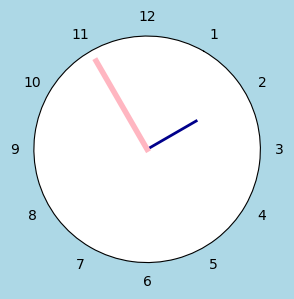

In [684]:



def draw_clock(angle_hour,angle_minute):
    '''
    Return image of the clock

    Input:
        angle_hour (float): the angle between the hour hand and 12 o' clock position unit is radians.
        angle_minute (float): the angle between the minute hand and 12 o' clock position unit is radians.
    
    Output:
        image of the clock.
    
    '''
    #draw analog clock
        # Lines 20-33: Yefeng Xia
        # URL: https://python.plainenglish.io/building-an-analog-clock-using-python-518922d57784
        # Accessed on 4 Nov 2021.
    angle_x_hour = angle_hour-np.pi/6
    angle_x_minute  = angle_minute-np.pi/6
    fig= plt.figure(figsize=(3,3),dpi=100, facecolor='lightblue')
    ax = fig.add_subplot(111, polar=True)
    plt.cla()
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
    ax.set_xticklabels(range(1,13))
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi/3.0)
    ax.grid(False)
    plt.ylim(0,1)
    ax.plot([angle_x_hour,angle_x_hour], [0,0.5], color="darkblue", linewidth=2)
    ax.plot([angle_x_minute,angle_x_minute], [0,0.9], color="lightpink", linewidth=4)


    

print(draw_clock(np.pi/3,np.pi*11/6))


---
## Task 5: Analog to digital conversion [5 marks]

🚩 Write a function `analog_to_digital(angle_hour, angle_minute)` that takes two input arguments, corresponding to the angles formed by each hand with 12 o'clock, and returns the time in digital format. More specifically, the output is a string showing the time in hour and minute in the format `hh:mm`, where `hh` is the hour and `mm` is the minute.

- When the hour is smaller than 10, add a leading zero (e.g. `04:30`).
- When the hour is zero, display `12`.

At this point, your function is not concerned about the imprecision. It should calculate the hour from the hour hand, and the minute from the minute hand, separately.

---
✅ *Testing:* the same angles as in Task 4 should give you `02:55`.

In [685]:
def analog_to_digital(angle_hour, angle_minute):
     '''
    Return the digital time in format hh:mm.

    Input:
        angle_hour (float): the angle between the hour hand and 12 o' clock position unit is radians.
        angle_minute (float): the angle between the minute hand and 12 o' clock position unit is radians.
    
    Output:
        time (string): the digital time in format hh:mm.
    
    '''
     #find hour and minute. in format hh and mm.
        # syntax to add leading zero number
        # Lines 18-19: Kite
        # URL: https://www.kite.com/python/answers/how-to-add-leading-zeros-to-a-number-in-python
        # Accessed on 4 Nov 2021.
     hour = str(int(round(angle_hour*180/np.pi)*12/360)).zfill(2)
     minute = str(round(angle_minute*30 / np.pi)).zfill(2)
     #if the hour is 00 display 12
     if hour == '00':
          hour = '12'
     else:
          hour = hour
     #create parametre called time to conclude hour and minute in formate hh:mm 
     time = hour+ ':' +minute
     return time

print(analog_to_digital(np.pi/3,np.pi*11/6))




02:55


---
## Task 6: Find the misalignment [5 marks]

Now that you have extracted useful information from the pictures, you need to check if the two hands are aligned properly. To do so, you will need to find the exact time that the **small hand** is showing, in hours and minutes. Then, compare with the minutes that the big hand is showing, and report the difference.

Note that the misalignment will never be more than 30 minutes. For example, if you read a 45-minute difference between the minutes indicated by the hour hand and by the minute hand, you can realign the minute hand by 15 minutes in the other direction instead.

---

🚩 Write a function `check_alignment(angle_hour, angle_minute)` which returns the misalignment in minutes.

Make sure you structure you code sensibly. You may wish to use some intermediate functions to do the sub-tasks.

---
✅ *Testing:* the same angles as in Task 4 should give you a 5-minute misalignment.

In [686]:
def check_alignment(angle_hour,angle_minute):
    '''
    Return misalignment in minute.

    Input:
        angle_hour (float): the angle between the hour hand and 12 o' clock position unit is radians.
        angle_minute (float): the angle between the minute hand and 12 o' clock position unit is radians.
    
    Output:
        time_diff (int): misalignment in minute.
    
    '''
    #find hour of small hand by divide angle_hour by pi/6
    hour_smallhand = int(angle_hour*6/np.pi)
    #find minute of small hand by find different angle between the numbers which small hand pointed to and the actual small hand. Then change it to minute.
    min_smallhand = int(np.absolute((angle_hour - (hour_smallhand*np.pi/6)))*(60/(np.pi/6)))
    #find minute of bighand by divide mnute_hour by pi/30
    min_bighand = angle_minute*30/np.pi
    time_diff = np.absolute(round(min_bighand-min_smallhand))
    #re-adjust of misalignment is greater than 30 by subtracted it from 60
    if time_diff>30:
        time_diff = 60-time_diff
    else:
        time_diff = time_diff
    return time_diff

print(check_alignment(np.pi/3,np.pi*11/6))



5


---
## Task 7: Putting it all together [6 marks]

Now that you have successfully broken down the problem into a sequence of sub-tasks, you need to combine all the above steps in one function.

🚩 Write a function `validate_clock(filename)` that takes the name of an image file (a picture of a clock face) as an input argument, and returns the misalignment in minutes as an integer.

Then, write a function `validate_batch(path, tolerance)` which takes 2 input arguments: `path`, a string to indicate the path of a folder containing a batch of clock pictures, and `tolerance`, a positive integer representing the maximum tolerable number of minutes of misalignment for a clock to pass the quality control check.

Your `validate_batch()` function should write a .txt file called `batch_X_QC.txt` (where `X` should be replaced by the batch number), containing the following information:

```
Batch number: [X]
Checked on [date and time]

Total number of clocks: [X]
Number of clocks passing quality control ([X]-minute tolerance): [X]
Batch quality: [X]%

Clocks to send back for readjustment:
clock_[X]   [X]min
clock_[X]   [X]min
clock_[X]   [X]min
[etc.]
```

The square brackets indicate information which you need to fill in.

- You will need to check all pictures in the given folder. You may wish to use Python's `os` module.
- The date and time should be the exact date and time at which you performed the validation, in the format `YYYY-MM-DD, hh:mm:ss`. You may wish to use Python's `datetime` module.
- The batch quality is the percentage of clocks which passed the quality control in the batch, rounded to 1 decimal place. For example, in a batch of 20 clocks, if 15 passed the control and 5 failed, the batch quality is `75.0%`.
- List all clock numbers which should be sent back for realignment, in **decreasing order of misalignment**. That is, the most misaligned clock should appear first.
- The list of clocks to send back and the misalignment in minutes should be vertically aligned, in a way which makes the report easy to read. Check the example in the `testing` folder.
- Your function should not return anything, simply write the .txt report.

For instance, to use your function to check batch 1 with a 2-minute maximum acceptable misalignment, the command will be `validate_batch('clock_images/batch_1', 2)`.

---

✅ *Testing:* There is an example report in the `testing` folder (for a batch which you do not have), to check that your report is formatted correctly.

---

🚩 Use your function `validate_batch()` to generate quality control reports for the 5 batches of clocks provided in the `clock_images` folder, with a tolerance of 3 minutes.

Your reports should all be saved in a folder called `QC_reports`, which you should create using Python. You should generate all 5 reports and include them in your submission.


In [687]:
#import os library to use os.listdir() for read files in folder
import os
def validate_clock(filename):
    '''
    Return misalignment in minute.

    Input:
        filename (string): path and name of the clock image file.
    
    Output:
        misalignment (int): misalignment in minute.
    
    '''

    clock_file = plt.imread(filename)                      #get pixel array of the image
    clockhand_array = get_clock_hands(clock_file)          #get coordinate arrays of hour and minute hands.
    clockhand_angle_hr = get_angle(clockhand_array[0])     #get angle of hour hand
    clockhand_angle_min = get_angle(clockhand_array[1])    #get angle of minute hands
    misalignment = check_alignment(clockhand_angle_hr,clockhand_angle_min)  #get misalignment in minute
    return misalignment

import datetime

print(validate_clock('clock_images/batch_0/clock_27.png'))

def validate_batch(path, tolerance):
    '''
    Return text file which include Batch number, Checked on [date and time], Total number of clocks, 
    Number of clocks passing quality control, Batch quality and Clocks to send back for readjustment.

    Input:
        path (string): path of the batch's folder.
        tolerance (int): the greatest misalignment that is acceptable in minute.
    
    Output:
        batch_[batch no.]_QC.txt (text file): text file which include Batch number, Checked on [date and time], 
        Total number of clocks, Number of clocks passing quality control, Batch quality and Clocks to send back 
        for readjustment.
    
    '''
    #create a list to store clock name and misalignment of all clocks 
    all_misalignment_list = []
    
    #create a list to store clock name and its alignment that need to be adjusted
    readjusted_list = []
    
    #use os.listdir() and os.path.join for read files in folder
    for filename in os.listdir(path):
        clock_vali = os.path.join(path, filename)
        misalignment = validate_clock(clock_vali)           #get misalignment in minute
        all_misalignment_list.append([filename[:-4],misalignment]) #apend clock name and its misalignment in all_misalignment_list
        no_of_all = len(all_misalignment_list)      #find number of all clocks
    
    for i in range (0,no_of_all-1):                 #for clock with misalingment more than tolerance, apend clock name and its alignment to readjusted_list
         if all_misalignment_list[i][1] > tolerance:
             readjusted_list.append(all_misalignment_list[i])
    no_of_readjust = len(readjusted_list)           #find number of clock that need to be readjusted
    
    #sorted 2D array
        # Lines 61 : roippi
        # URL: https://stackoverflow.com/questions/20183069/how-to-sort-multidimensional-array-by-column
        # Accessed on 6 Nov 2021.
    sorted_readjusted_list = sorted(readjusted_list, key=lambda x:x[1], reverse=True)       # sorted readjust list according to it's alignment decending way
    no_of_pass = no_of_all-no_of_readjust       #find number of passing clocks
    batch_quality = round(no_of_pass/no_of_all*100,2)   #find nbatch quality
    
    #find real time
        # Lines 72 : Flimm
        # URL: https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
        # Accessed on 9 Nov 2021.
        # Lines 72 : programiz
        # URL: https://www.programiz.com/python-programming/datetime
        # Accessed on 9 Nov 2021.
    datetime_check = datetime.datetime.now().strftime('%Y-%m-%d, %H:%M:%S')
     
     #write in text file.
        # Lines 78-86: prasertcbs
        # URL: https://www.youtube.com/watch?v=2HiwKDQr0AA
        # Accessed on 6 Nov 2021.
    f = open('QC_reports/batch_'+path[-1]+'_QC.txt','w')
    f.write('Batch number: '+path[-1]+'\n')
    f.write(f'Checked on [date and time]: {datetime_check}\n')
    f.write('\n')
    f.write('Total number of clocks: '+str(no_of_all)+'\n')
    f.write('Number of clocks passing quality control ('+str(tolerance)+'-minute tolerance):'+ str(no_of_pass) +'\n')
    f.write('Batch quality: '+str(batch_quality)+'%\n')
    f.write('\n')
    f.write('Clocks to send back for readjustment:\n')
    for clock in sorted_readjusted_list:
        f.write(f'{clock[0]:10}  {clock[1]}min\n')


    

    
           


        

        

validate_batch('clock_images/batch_0',3)
validate_batch('clock_images/batch_1',3)
validate_batch('clock_images/batch_2',3)
validate_batch('clock_images/batch_3',3)
validate_batch('clock_images/batch_4',3)





    

7
